In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
from google.colab import files
upload = files.upload()

Saving AAPL.csv to AAPL.csv


In [ ]:
data = pd.read_csv('/content/AAPL.csv')
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-29,100.589996,100.690002,98.040001,99.620003,93.514290,142718700
1,2014-10-06,99.949997,102.379997,98.309998,100.730003,94.556244,280258200
2,2014-10-13,101.330002,101.779999,95.180000,97.669998,91.683792,358539800
3,2014-10-20,98.320000,105.489998,98.220001,105.220001,98.771042,358532900
4,2014-10-27,104.849998,108.040001,104.699997,108.000000,101.380676,220230600
...,...,...,...,...,...,...,...
179,2018-03-05,175.210007,180.000000,174.270004,179.979996,179.979996,139852700
180,2018-03-12,180.289993,183.500000,177.619995,178.020004,178.020004,155417500
181,2018-03-19,177.320007,177.470001,164.940002,164.940002,164.940002,172670700
182,2018-03-26,168.070007,175.149994,165.190002,167.779999,167.779999,157898400


In [ ]:
data.shape

(184, 7)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       184 non-null    object 
 1   Open       184 non-null    float64
 2   High       184 non-null    float64
 3   Low        184 non-null    float64
 4   Close      184 non-null    float64
 5   Adj Close  184 non-null    float64
 6   Volume     184 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 10.2+ KB


In [ ]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [ ]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,184.000000,184.000000,184.000000,184.000000,184.000000,1.840000e+02
mean,127.040245,129.918098,124.340381,127.352663,123.838032,1.910168e+08
std,24.314449,24.577906,24.176736,24.356534,25.655569,8.160281e+07
min,92.389999,93.769997,89.470001,90.519997,87.796822,3.839850e+07
25%,108.882499,112.362499,106.152502,109.204998,105.301765,1.273706e+08
50%,118.895000,120.865002,116.870003,119.190002,114.999730,1.744112e+08
75%,144.935005,147.695000,143.227493,144.704994,143.039467,2.207755e+08
max,180.289993,183.500000,177.619995,179.979996,179.979996,5.003630e+08


In [ ]:
df = pd.DataFrame(data)

NameError: ignored

dual moving average crossover to determine when to buy and sell the stock, it occurs when a short term average crosses a long term average  
this signal is used to identify that momentum is shifting in the direction of the short term average and a buy signal is generated when the short term average crosses the long term average and rises above it while a selll signal is triggered by a short term average crossing a long term average and falling below it


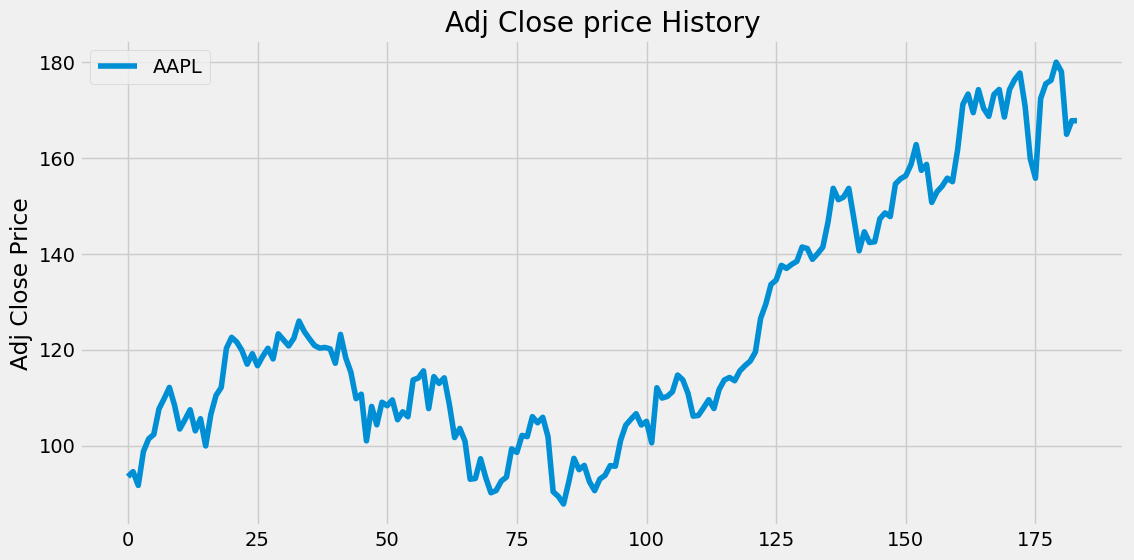

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Adj Close'],label = 'AAPL')
plt.title('Adj Close price History')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
# Simple Moving Average with 30 day window
SMA10 = pd.DataFrame()
SMA10['Adj Close'] = data['Adj Close'].rolling(window=10).mean()
SMA10

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,171.895239
180,172.268300
181,171.125209
182,170.129674


In [ ]:
# Simple Moving Average with 100 day window
SMA20 = pd.DataFrame()
SMA20['Adj Close'] = data['Adj Close'].rolling(window=20).mean()
SMA20

,Adj Close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
179,171.207125
180,172.017812
181,171.705604
182,171.427724


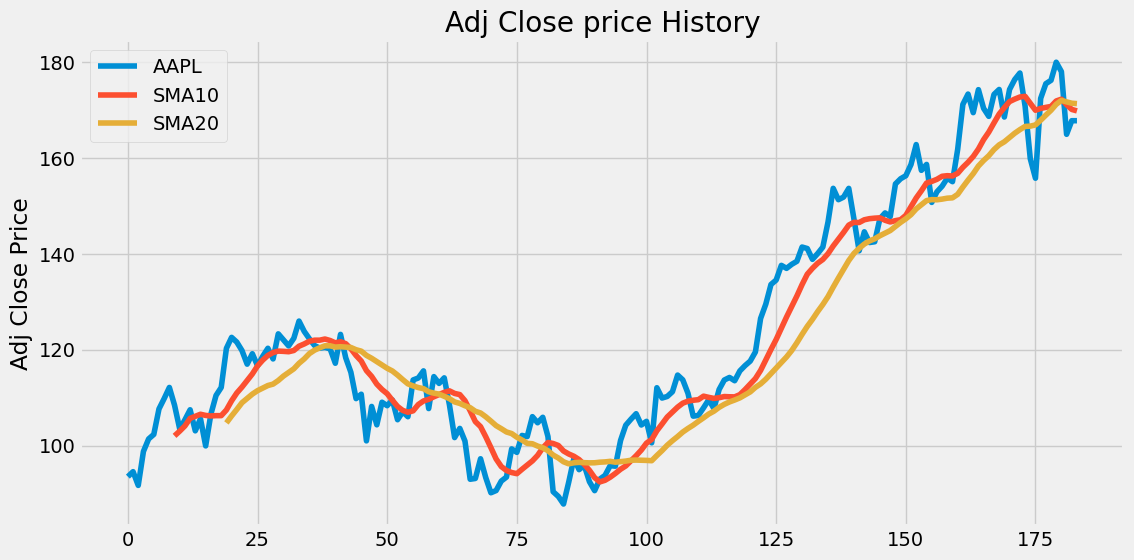

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(data['Adj Close'],label = 'AAPL')
plt.plot(SMA10['Adj Close'],label = 'SMA10')
plt.plot(SMA20['Adj Close'],label = 'SMA20')
plt.title('Adj Close price History')
plt.ylabel('Adj Close Price')
plt.legend(loc='upper left')
plt.show()

In [ ]:
shortEMA =

In [ ]:
df = pd.DataFrame()
df['AAPL'] = data['Adj Close']
df['SMA10'] = SMA10['Adj Close']
df['SMA20'] = SMA20['Adj Close']
df

,AAPL,SMA10,SMA20
0,93.514290,NaN,NaN
1,94.556244,NaN,NaN
2,91.683792,NaN,NaN
3,98.771042,NaN,NaN
4,101.380676,NaN,NaN
...,...,...,...
179,179.979996,171.895239,171.207125
180,178.020004,172.268300,172.017812
181,164.940002,171.125209,171.705604
182,167.779999,170.129674,171.427724


In [ ]:
#create a function to signal when to buy and sell the stock
def buy_and_sell(data):
  sigPriceBuy = []
  sigPriceSell = []
  flag = -1
#flags basically tell when thw two moving avgerages crossed past each other

  for i in range(len(data)):
    if df['SMA10'][i] > df['SMA20'][i]:
      if flag != 1:
        sigPriceBuy.append(df['AAPL'][i])
        sigPriceSell.append(np.nan)
        falg = 1
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    elif df['SMA10'][i] < df['SMA20'][i]:
      if flag != 0:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(df['AAPL'][i])
        falg = 0
      else:
        sigPriceBuy.append(np.nan)
        sigPriceSell.append(np.nan)
    else:
      sigPriceBuy.append(np.nan)
      sigPriceSell.append(np.nan)

  return (sigPriceBuy,sigPriceSell)

In [ ]:
buy_sell

In [ ]:
#store the buy and sell data into the variables
buy_sell = buy_and_sell(df)
df['Buy_signal_price'] = buy_sell[0]
df['Sell_signal_price'] = buy_sell[1]
df

,AAPL,SMA10,SMA20,Buy_signal_price,Sell_signal_price
0,93.514290,NaN,NaN,NaN,NaN
1,94.556244,NaN,NaN,NaN,NaN
2,91.683792,NaN,NaN,NaN,NaN
3,98.771042,NaN,NaN,NaN,NaN
4,101.380676,NaN,NaN,NaN,NaN
...,...,...,...,...,...
179,179.979996,171.895239,171.207125,179.979996,NaN
180,178.020004,172.268300,172.017812,178.020004,NaN
181,164.940002,171.125209,171.705604,NaN,164.940002
182,167.779999,170.129674,171.427724,NaN,167.779999


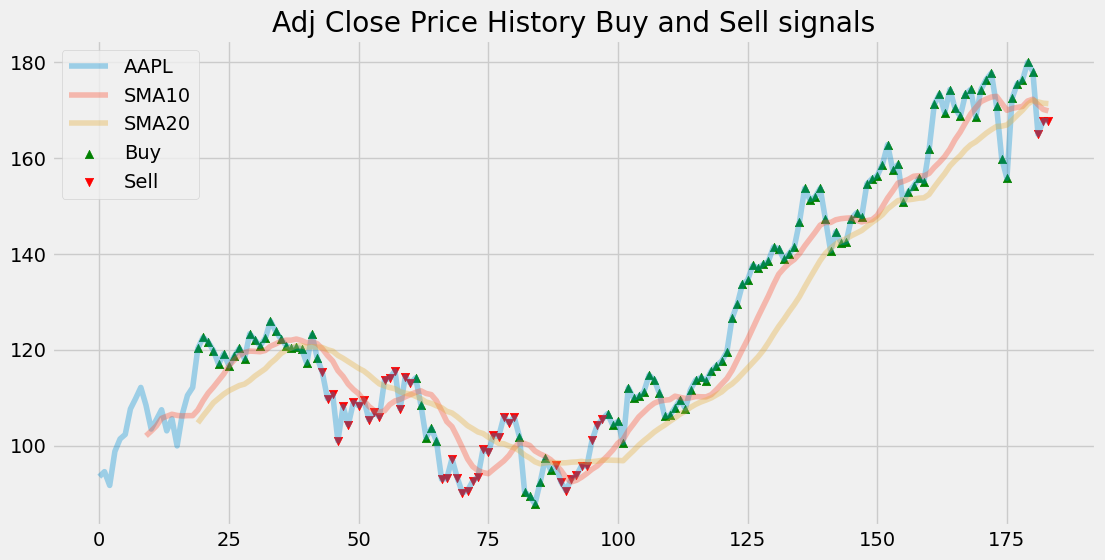

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(df['AAPL'],label = 'AAPL',alpha = 0.35)
plt.plot(df['SMA10'],label = 'SMA10',alpha = 0.35)
plt.plot(df['SMA20'],label = 'SMA20',alpha = 0.35)
plt.scatter(df.index,df['Buy_signal_price'],label = 'Buy',marker = '^',color = 'green')
plt.scatter(df.index,df['Sell_signal_price'],label = 'Sell',marker = 'v',color = 'red')
plt.title('Adj Close Price History Buy and Sell signals')
plt.legend(loc='upper left')
plt.show()

In [10]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf

In [8]:
start = dt.datetime(2023,5,1)
end = dt.datetime.now()

In [16]:
data = yf.download('GLD',start,end)
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-01,186.050003,186.220001,183.910004,183.970001,183.970001,7997700
2023-05-02,184.649994,187.639999,184.520004,187.520004,187.520004,14680600
2023-05-03,187.610001,189.210007,186.929993,189.110001,189.110001,11133800
2023-05-04,188.860001,191.360001,188.809998,190.440002,190.440002,14146800
2023-05-05,186.559998,187.580002,185.770004,187.460007,187.460007,12507000
...,...,...,...,...,...,...
2023-11-30,188.889999,189.240005,188.279999,188.750000,188.750000,7558100
2023-12-01,188.809998,192.399994,188.690002,192.009995,192.009995,16724900
2023-12-04,189.600006,190.380005,187.259995,187.860001,187.860001,18460500


In [17]:
day = np.arange(1,len(data) + 1)
data['day'] = day
data.drop(columns = ['Adj Close','Volume'], inplace = True)
data = data[['day','Open','High','Low','Close']]
data.head()

,day,Open,High,Low,Close
Date,,,,,
2023-05-01,1,186.050003,186.220001,183.910004,183.970001
2023-05-02,2,184.649994,187.639999,184.520004,187.520004
2023-05-03,3,187.610001,189.210007,186.929993,189.110001
2023-05-04,4,188.860001,191.360001,188.809998,190.440002
2023-05-05,5,186.559998,187.580002,185.770004,187.460007


In [18]:
data.describe()

,day,Open,High,Low,Close
count,153.000000,153.000000,153.000000,153.000000,153.000000
mean,77.000000,180.778496,181.462680,180.112027,180.739608
std,44.311398,4.306801,4.448286,4.274669,4.437230
min,1.000000,168.740005,169.000000,168.300003,168.830002
25%,39.000000,178.330002,178.919998,177.690002,178.020004
50%,77.000000,180.990005,181.940002,180.179993,180.639999
75%,115.000000,183.419998,184.130005,182.669998,183.509995
max,153.000000,189.600006,192.399994,189.020004,192.009995


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 153 entries, 2023-05-01 to 2023-12-06
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   day     153 non-null    int64  
 1   Open    153 non-null    float64
 2   High    153 non-null    float64
 3   Low     153 non-null    float64
 4   Close   153 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.2 KB


In [21]:
data['9-day'] = data['Close'].rolling(9).mean().shift()
data['21-day'] = data['Close'].rolling(21).mean().shift()
data[19:25]

<ipython-input-21-a6e51d1d3ba7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['9-day'] = data['Close'].rolling(9).mean().shift()
<ipython-input-21-a6e51d1d3ba7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['21-day'] = data['Close'].rolling(21).mean().shift()


,day,Open,High,Low,Close,9-day,21-day
Date,,,,,,,
2023-05-26,20,181.009995,181.300003,180.089996,180.919998,183.397776,NaN
2023-05-30,21,181.720001,182.399994,181.169998,182.039993,182.698886,NaN
2023-05-31,22,182.389999,183.449997,182.100006,182.320007,182.384442,185.306667
2023-06-01,23,182.809998,184.210007,182.720001,183.759995,182.172221,185.228096
2023-06-02,24,183.529999,183.559998,180.960007,181.050003,182.385554,185.049048
2023-06-05,25,180.789993,182.440002,180.600006,182.139999,182.097777,184.665238


In [23]:
data['signal'] = np.where(data['9-day'] > data['21-day'], 1, 0)
data['signal'] = np.where(data['9-day'] < data['21-day'], -1, data['signal'])
data.dropna(inplace = True)
data.head()

<ipython-input-23-d4776a557a52>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = np.where(data['9-day'] > data['21-day'], 1, 0)
<ipython-input-23-d4776a557a52>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['signal'] = np.where(data['9-day'] < data['21-day'], -1, data['signal'])
<ipython-input-23-d4776a557a52>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stabl

,day,Open,High,Low,Close,9-day,21-day,signal
Date,,,,,,,,
2023-05-31,22,182.389999,183.449997,182.100006,182.320007,182.384442,185.306667,-1
2023-06-01,23,182.809998,184.210007,182.720001,183.759995,182.172221,185.228096,-1
2023-06-02,24,183.529999,183.559998,180.960007,181.050003,182.385554,185.049048,-1
2023-06-05,25,180.789993,182.440002,180.600006,182.139999,182.097777,184.665238,-1
2023-06-06,26,182.360001,182.649994,181.520004,182.339996,181.978887,184.270000,-1


In [26]:
data['returns'] = np.log(data['Close']).diff()
data['System_returns'] = data['signal'] * data['returns']
data['entry'] = data.signal.diff()
data

<ipython-input-26-19eee0549b4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['returns'] = np.log(data['Close']).diff()
<ipython-input-26-19eee0549b4c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['System_returns'] = data['signal'] * data['returns']
<ipython-input-26-19eee0549b4c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

,day,Open,High,Low,Close,9-day,21-day,signal,returns,System_returns,entry
Date,,,,,,,,,,,
2023-05-31,22,182.389999,183.449997,182.100006,182.320007,182.384442,185.306667,-1,NaN,NaN,NaN
2023-06-01,23,182.809998,184.210007,182.720001,183.759995,182.172221,185.228096,-1,0.007867,-0.007867,0.0
2023-06-02,24,183.529999,183.559998,180.960007,181.050003,182.385554,185.049048,-1,-0.014857,0.014857,0.0
2023-06-05,25,180.789993,182.440002,180.600006,182.139999,182.097777,184.665238,-1,0.006002,-0.006002,0.0
2023-06-06,26,182.360001,182.649994,181.520004,182.339996,181.978887,184.270000,-1,0.001097,-0.001097,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-30,149,188.889999,189.240005,188.279999,188.750000,185.747777,183.819999,1,-0.004177,-0.004177,0.0
2023-12-01,150,188.809998,192.399994,188.690002,192.009995,186.309999,184.041904,1,0.017124,0.017124,0.0
2023-12-04,151,189.600006,190.380005,187.259995,187.860001,187.236666,184.446665,1,-0.021850,-0.021850,0.0


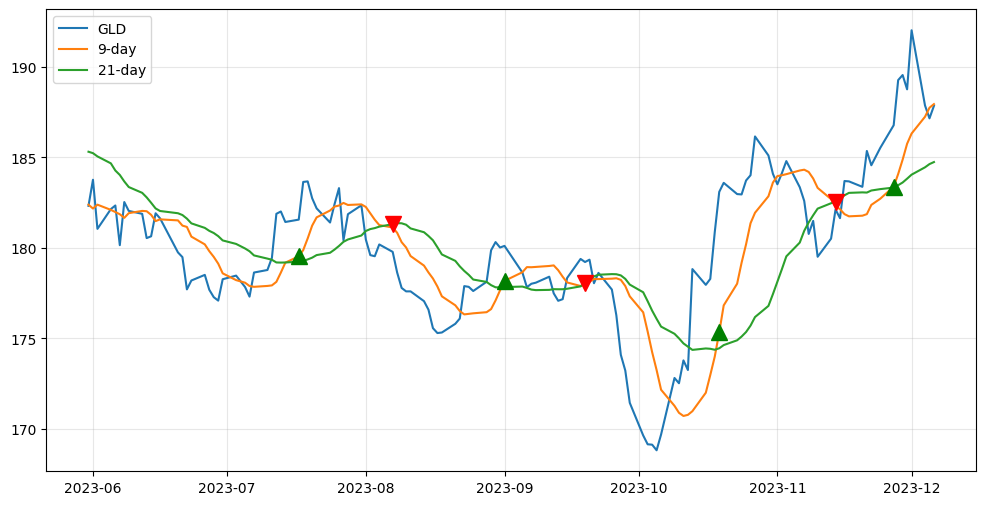

In [37]:
plt.rcParams['figure.figsize'] = 12,6
plt.grid(True, alpha = .3)
plt.plot(data.iloc[-252:]['Close'], label = 'GLD')
plt.plot(data.iloc[-252:]['9-day'], label = '9-day')
plt.plot(data.iloc[-252:]['21-day'], label = '21-day')
plt.plot(data[-252:].loc[data.entry == 2].index, data[-252:]['9-day'][data.entry == 2], '^',color = 'g', markersize = 12)
plt.plot(data[-252:].loc[data.entry == -2].index, data[-252:]['21-day'][data.entry == -2], 'v',color = 'r', markersize = 12)
plt.legend(loc=2);

<ipython-input-40-5aefb9a13cd7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['System_returns'] = data.signal * data.returns


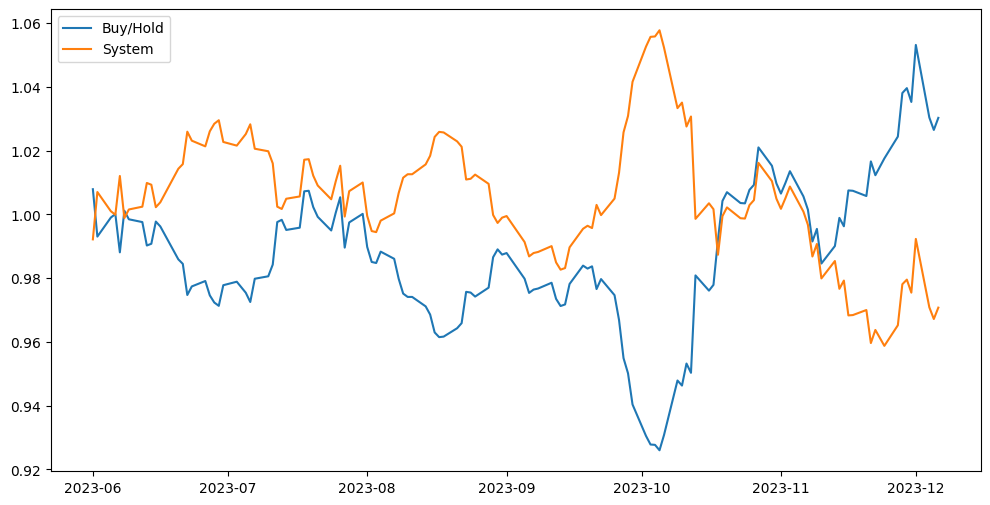

In [40]:
data['System_returns'] = data.signal * data.returns
plt.plot(np.exp(data.returns).cumprod(), label = 'Buy/Hold')
plt.plot(np.exp(data.System_returns).cumprod(), label = 'System')
plt.legend(loc=2)

In [41]:
np.exp(data['returns']).cumprod()[-1]-1
np.exp(data['System_returns'].cumprod()[-1]-1)

0.36787944117144233

In [ ]:
ma_1 = 30
ma_2 = 100
data1